# 📺 Candy Candy: Cultural Impact on Name Trends

**Author:** Blanca Vargas  
**Role:** Data-to-Content Creator, Applied AI, and Educator

## 🎯 Introduction
In the 1980s, the anime *Candy Candy* captivated audiences across Latin America and Europe. Beyond its emotional storytelling and beloved characters, its cultural footprint raised an intriguing question:

**Could the popularity of a fictional character influence real-world name trends?**

This notebook investigates that question through the lens of the character **Susana**, who played a pivotal role in a dramatic romantic twist that marked many childhoods. We explore the hypothesis:

> *The broadcast of Candy Candy contributed to a measurable decline in the use of the name "Susana" in Spanish-speaking countries.*

### 🇪🇸 🇺🇾 What you'll find here:
- **Data from Spain and Uruguay** (1970–2010)
- Frequency analysis of names from the show: `Susana`, `Ana`, `Patricia`, and a neutral reference name
- **Visualizations** of absolute and relative trends over time
- A **statistical test** to evaluate whether Susana’s decline is significantly different

This is both a data exploration and a cultural reflection — blending analytics with storytelling to trace how media can shape the choices people make when naming their children.

Let’s begin. 🌸


## 📥 Load Data

In [1]:
import pandas as pd

esp_abs = pd.read_csv('./outputs/tables/frecuencia_absoluta_espana.csv')
esp_rel = pd.read_csv('./outputs/tables/frecuencia_relativa_espana.csv')
uru_abs = pd.read_csv('./outputs/tables/frecuencia_absoluta_uruguay.csv')
uru_rel = pd.read_csv('./outputs/tables/frecuencia_relativa_uruguay.csv')

## 📊 Visualizing Trends

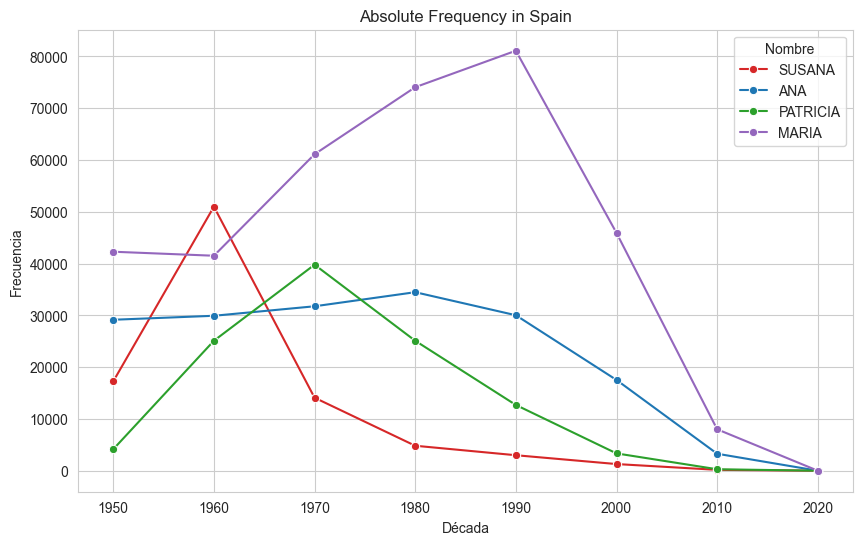

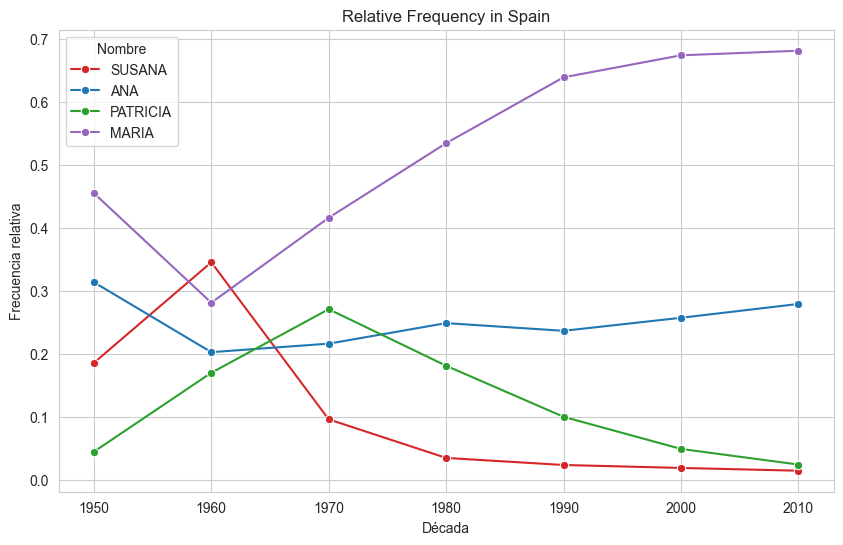

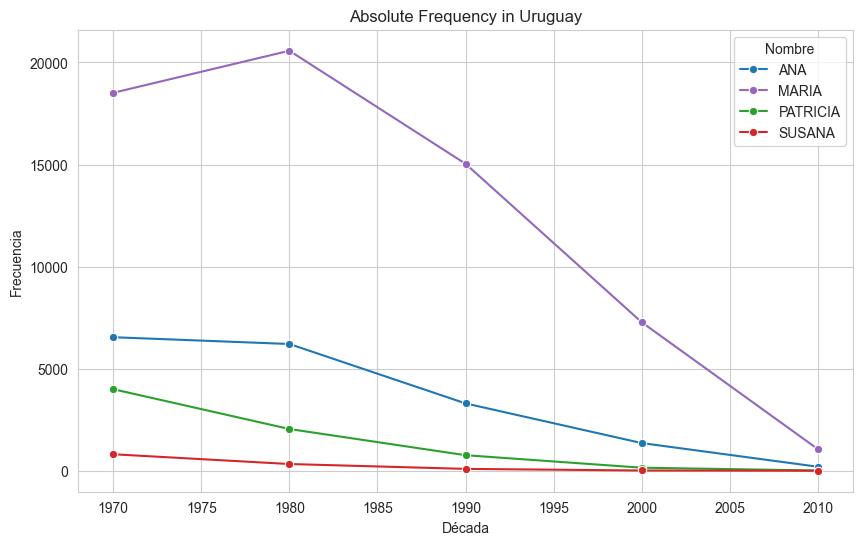

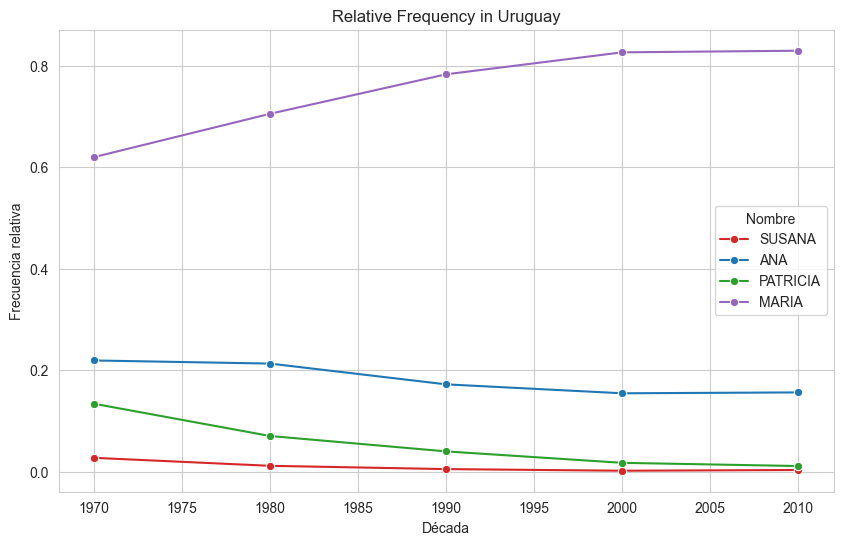

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = {'SUSANA': '#D62728', 'ANA': '#1F77B4', 'PATRICIA': '#2CA02C', 'MARIA': '#9467BD'}

def plot_line(df, y_label, title):
    df_melt = df.melt(id_vars='Década', var_name='Nombre', value_name=y_label)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_melt, x='Década', y=y_label, hue='Nombre', palette=palette, marker='o')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_line(esp_abs, "Frecuencia", "Absolute Frequency in Spain")
plot_line(esp_rel, "Frecuencia relativa", "Relative Frequency in Spain")
plot_line(uru_abs, "Frecuencia", "Absolute Frequency in Uruguay")
plot_line(uru_rel, "Frecuencia relativa", "Relative Frequency in Uruguay")

## 🧪 Statistical Test: Chi-squared

In [8]:
from scipy.stats import chi2_contingency

df_chi = esp_abs[esp_abs['Década'].between(1970, 2010)][['Década', 'SUSANA', 'PATRICIA']]
chi_data = df_chi.set_index('Década').T.values

stat, p, dof, expected = chi2_contingency(chi_data)

print("Chi-squared statistic:", round(stat, 2))
print("p-value:", p)
if p < 0.05:
    print("✅ Statistically significant difference in decline between Susana and Patricia.")
else:
    print("❌ No significant difference detected.")

Chi-squared statistic: 1357.46
p-value: 1.1582309798229652e-292
✅ Statistically significant difference in decline between Susana and Patricia.


## 🌺 Reflections and Closing Thoughts

This exploration brought together two seemingly distant worlds: childhood nostalgia and data science.

Our analysis showed that the name **Susana** declined notably after the 1980s in Spain, and that decline was **statistically more pronounced** than similar names like Ana or Patricia. Yet, we also observed that in Uruguay, where *Candy Candy* had less media impact, the name Susana declined as well, reminding us that **multiple cultural and social forces** shape naming trends.

So, while we can't claim that Candy Candy alone changed baby name choices, we can say this:

> *In a country where the anime struck an emotional chord, the name of a character who broke many hearts seems to have quietly faded.*

This notebook is not just about plots and p-values. It’s about how **fiction touches real life** — one name, one story, one generation at a time.

Thanks for following along 💫
